Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing & Loading Dataset

In [3]:
df=pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


DataSet info:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.shape

(614, 13)

Data Cleaning

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

First we fill LoanAmount & Credit_History by mean & median of the respective variables

In [12]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [43]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

Now we will be checking if there is any null values on LoanAmount & Credit_History

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Now we will drop all the remaining null values

In [15]:
df.dropna(inplace=True)

Again we check if there is any null values in the dataset for assurance

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here we have dropped all the missing values and disturbances of the model.

Now let's examine our final dataset

In [18]:
df.shape

(542, 13)

Exploratory Data Analysis

In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Now we are plotting graphs between categorical parameters and loan status. 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

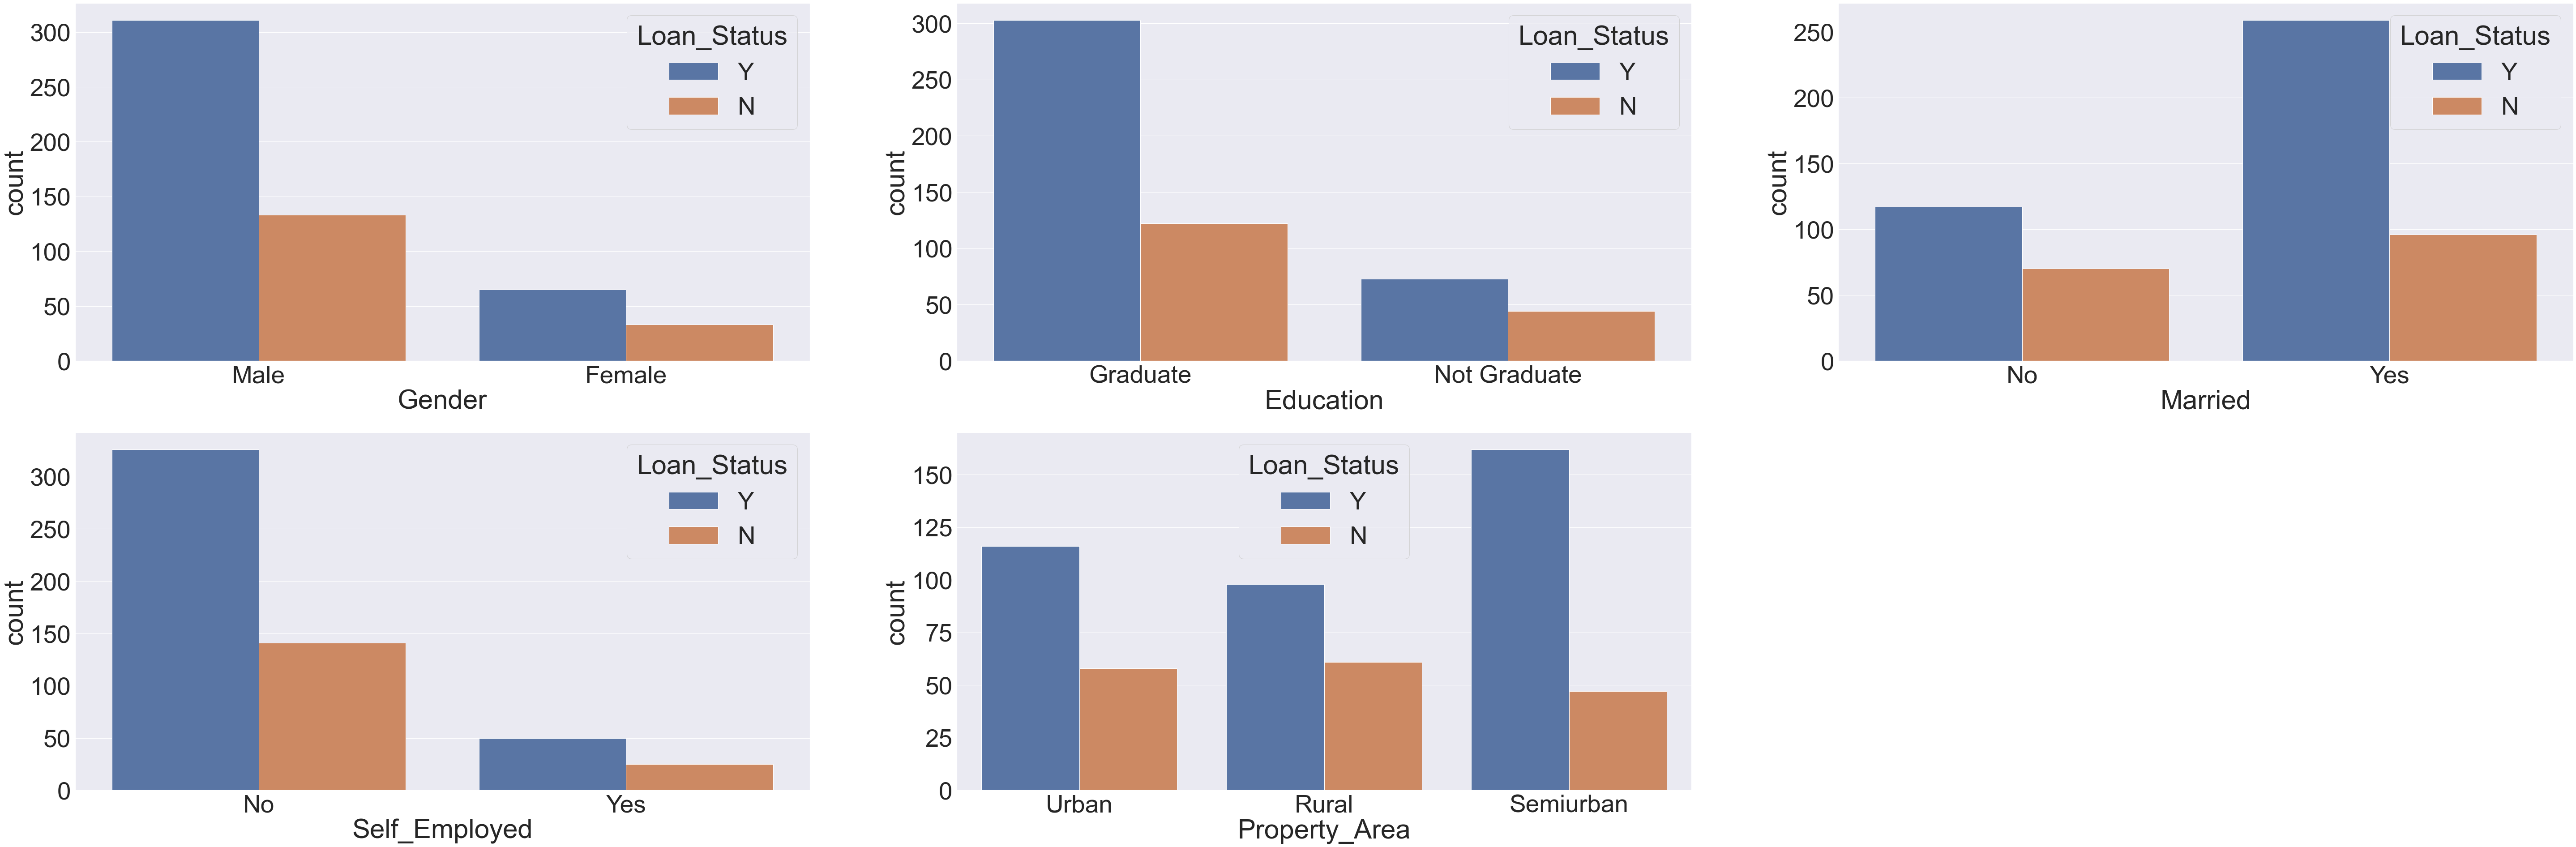

In [25]:
plt.figure(figsize=(100,50))
sns.set(font_scale=5)

plt.subplot(3,3,1)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

plt.subplot(3,3,2)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.subplot(3,3,3)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.subplot(3,3,4)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.subplot(3,3,5)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])


Since Logistic Regression provides probabilistic values between 0 & 1.
So, we replace discrete categorical variables to 0 and 1

Lets replace the variable values to numerical form & display the value counts
This process helps to avoid disturbances in building the model

In [28]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [29]:
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [32]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [33]:
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [34]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [35]:
df['Dependents']=df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
2     94
1     94
3     45
Name: Dependents, dtype: int64

In [36]:
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [37]:
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [38]:
df['Property_Area']=df['Property_Area'].map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [39]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
53.000000      1
65.000000      1
109.000000     1
156.000000     1
89.000000      1
Name: LoanAmount, Length: 195, dtype: int64

In [45]:
df['Credit_History'].value_counts()

1.000000    425
0.000000     74
0.842199     43
Name: Credit_History, dtype: int64

Final DataFrame

In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


Importing Packages for classification algorithms

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

splitting data into test and train data

In [50]:
df.shape

(542, 13)

In [54]:
X= df.iloc[1:542,1:12].values
y=df.iloc[1:542,12].values

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [57]:
X_train.shape

(378, 11)

In [58]:
X_test.shape

(163, 11)

In [60]:
y_train.shape

(378,)

Logistic Regression

This is one of the most popularly used ML algorithm, which is similar to that of linear regression. Linear Regression is used for regression whereas Logistic is used for classification.
In Logistic Regression instead of a fitting line, we fit an 'S' shaped logistic function which has probablistic values between 0 and 1

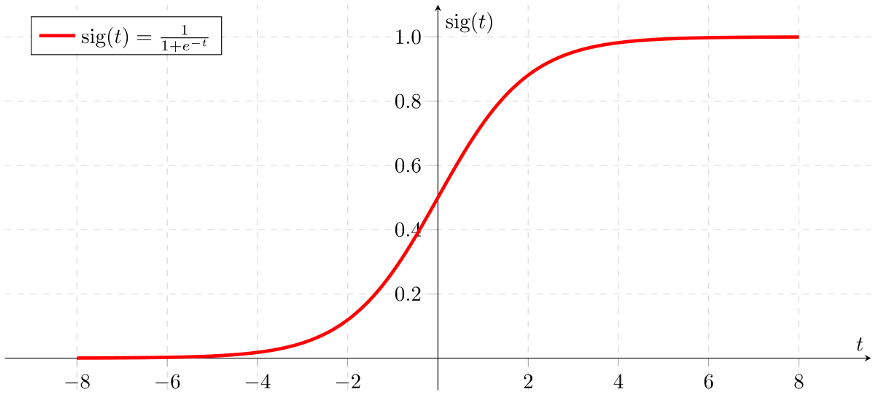

In [61]:
model=LogisticRegression()
model.fit(X_train,y_train)

lr_prediction=model.predict(X_test)
print('Logistic Regression accuracy=',metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy= 0.7852760736196319


In [72]:
df.shape

(542, 13)

In [ ]:
Conclusion
1. Here we got the test score accuracy as 79%.